# Boolean Indexing
## Recipes
* [Calculating boolean statistics](#Calculating-boolean-statistics)
* [Constructing multiple boolean conditions](#Constructing-multiple-boolean-conditions)
* [Filtering with boolean indexing](#Filtering-with-boolean-indexing)
* [Replicating boolean indexing with index selection](#Replicating-boolean-indexing-with-index-selection)
* [Selecting with unique and sorted indexes](#Selecting-with-unique-and-sorted-indexes)
* [Gaining perspective on stock prices](#Gaining-perspective-on-stock-prices)
* [Translating SQL WHERE clauses](#Translating-SQL-WHERE-clauses)
* [Determining the normality of stock market returns](#Determining-the-normality-of-stock-market-returns)
* [Improving readability of boolean indexing with the query method](#Improving-readability-of-boolean-indexing-with-the-query-method)
* [Preserving Series with the where method](#Preserving-Series-with-the-where-method)
* [Masking DataFrame rows](#Masking-DataFrame-rows)
* [Selecting with booleans, integer location, and labels](#Selecting-with-booleans,-integer-location-and-labels)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Introduction

Filtering data from a dataset is one of the most common and basic operations. There are numerous ways to filter (or subset) data in pandas with boolean indexing. Boolean indexing (also known as boolean selection) can be a confusing term, but for the purposes of pandas, it refers to selecting rows by providing a boolean value (True or False) for each row. These boolean values are usually stored in a Series or NumPy ndarray and are usually created by applying a boolean condition to one or more columns in a DataFrame. We begin by creating boolean Series and calculating statistics on them and then move on to creating more complex conditionals before using boolean indexing in a wide variety of ways to filter data.

# Calculating boolean statistics

In [2]:
# Read in the movie dataset, set the index to the movie title, and inspect the first few rows:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')
movie.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
Avatar,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
Pirates of the Caribbean: At World's End,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
Spectre,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
Star Wars: Episode VII - The Force Awakens,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
# Determine whether the duration of each movie is longer than two hours by using the greater than comparison operator with the duration Series::

movie_2_hours = movie['duration'] > 120
movie_2_hours.head(10)

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
John Carter                                    True
Spider-Man 3                                   True
Tangled                                       False
Avengers: Age of Ultron                        True
Harry Potter and the Half-Blood Prince         True
Name: duration, dtype: bool

In [4]:
# We can now use this Series to determine the number of movies that are longer than two hours:

movie_2_hours.sum()

1039

In [6]:
# To find the percentage of movies in the dataset longer than two hours, use the mean method:

movie_2_hours.mean()

0.2113506916192026

In [7]:
movie['duration'].dropna().gt(120).mean()

0.21199755152009794

In [8]:
movie_2_hours.describe()

count      4916
unique        2
top       False
freq       3877
Name: duration, dtype: object

# Constructing multiple boolean conditions


In Python, boolean expressions use the built-in logical operators and, or, and not. These keywords do not work with boolean indexing in pandas and are respectively replaced with &, |, and ~. Additionally, each expression must be wrapped in parentheses or an error will be raised.


In [9]:
# Load in the movie dataset and set the index as the title:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')


In [12]:
# Create a variable to hold each set of criteria independently as a boolean Series:

criteria1 = movie.imdb_score > 8
criteria2 = movie.content_rating == 'PG-13'
criteria3 = (movie.title_year < 2000) | (movie.title_year >= 2010)

criteria2.head()

movie_title
Avatar                                         True
Pirates of the Caribbean: At World's End       True
Spectre                                        True
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
Name: content_rating, dtype: bool

In [13]:
# Combine all the criteria together into a single boolean Series:

criteria_final = criteria1 & criteria2 & criteria3
criteria_final.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

# Filtering with boolean indexing

Boolean selection for Series and DataFrame objects is virtually identical. Both work by passing a Series of booleans indexed identically to the object being filtered to the indexing operator.

In [15]:
# Read in the movie dataset, set the index to the movie_title, and create the first set of criteria:
movie = pd.read_csv('data/movie.csv', index_col='movie_title')

crit_a1 = movie.imdb_score > 8
crit_a2 = movie.content_rating == 'PG-13'
crit_a3 = (movie.title_year < 2000) | (movie.title_year > 2009)
final_crit_a = crit_a1 & crit_a2 & crit_a3

In [16]:
# Create criteria for the second set of movies:

crit_b1 = movie.imdb_score < 5
crit_b2 = movie.content_rating == 'R'
crit_b3 = (movie.title_year >= 2000) & (movie.title_year <= 2010)
final_crit_b = crit_b1 & crit_b2 & crit_b3

Combine the two sets of criteria using the pandas or operator. This yields a boolean Series of all movies that are members of either set:

In [17]:
final_crit_all = final_crit_a | final_crit_b
final_crit_all.head()

movie_title
Avatar                                        False
Pirates of the Caribbean: At World's End      False
Spectre                                       False
The Dark Knight Rises                          True
Star Wars: Episode VII - The Force Awakens    False
dtype: bool

In [18]:
# Once you have your boolean Series, you simply pass it to the indexing operator to filter the data:

movie[final_crit_all].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
movie_title,,,,,,,,,,,,,,,,,,,,,
The Dark Knight Rises,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
The Avengers,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
Captain America: Civil War,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000
Guardians of the Galaxy,Color,James Gunn,653.0,121.0,571.0,3000.0,Vin Diesel,14000.0,333130696.0,Action|Adventure|Sci-Fi,...,1097.0,English,USA,PG-13,170000000.0,2014.0,14000.0,8.1,2.35,96000
Interstellar,Color,Christopher Nolan,712.0,169.0,22000.0,6000.0,Anne Hathaway,11000.0,187991439.0,Adventure|Drama|Sci-Fi,...,2725.0,English,USA,PG-13,165000000.0,2014.0,11000.0,8.6,2.35,349000


We have successfully filtered the data and all the columns of the DataFrame. We can't easily perform a manual check to determine whether the filter worked correctly. Let's filter both rows and columns with the .loc indexer:

In [19]:
cols = ['imdb_score', 'content_rating', 'title_year']
movie_filtered = movie.loc[final_crit_all, cols]
movie_filtered.head(10)

,imdb_score,content_rating,title_year
movie_title,,,
The Dark Knight Rises,8.5,PG-13,2012.0
The Avengers,8.1,PG-13,2012.0
Captain America: Civil War,8.2,PG-13,2016.0
Guardians of the Galaxy,8.1,PG-13,2014.0
Interstellar,8.6,PG-13,2014.0
Inception,8.8,PG-13,2010.0
The Martian,8.1,PG-13,2015.0
Town & Country,4.4,R,2001.0
Sex and the City 2,4.3,R,2010.0


# Replicating boolean indexing with index selection

It is possible to replicate specific cases of boolean selection by taking advantage of the index. Selection through the index is more intuitive and makes for greater readability.


In [21]:
# Read in the college dataset and use boolean indexing to select all institutions from the state of Texas (TX):


college = pd.read_csv('data/college.csv')
college[college['STABBR'] == 'TX'].head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
3610,Abilene Christian University,Abilene,TX,0.0,0.0,0.0,1,530.0,545.0,0.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
3611,Alvin Community College,Alvin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
3612,Amarillo College,Amarillo,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
3613,Angelina College,Lufkin,TX,0.0,0.0,0.0,0,NaN,NaN,0.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
3614,Angelo State University,San Angelo,TX,0.0,0.0,0.0,0,475.0,490.0,0.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [22]:
# To replicate this using index selection, we need to move the STABBR column into the index. We can then use label-based selection with the .loc indexer:

college2 = college.set_index('STABBR')
college2.loc['TX'].head()

,INSTNM,CITY,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
STABBR,,,,,,,,,,,,,,,,,,,,,
TX,Abilene Christian University,Abilene,0.0,0.0,0.0,1,530.0,545.0,0.0,3572.0,...,0.0454,0.0423,0.0045,0.0468,1,0.2595,0.5527,0.0381,40200,25985
TX,Alvin Community College,Alvin,0.0,0.0,0.0,0,NaN,NaN,0.0,4682.0,...,0.0002,0.0000,0.0143,0.7123,1,0.1549,0.0625,0.2841,34500,6750
TX,Amarillo College,Amarillo,0.0,0.0,0.0,0,NaN,NaN,0.0,9346.0,...,0.0000,0.0001,0.0085,0.6922,1,0.3786,0.1573,0.3431,31700,10950
TX,Angelina College,Lufkin,0.0,0.0,0.0,0,NaN,NaN,0.0,3825.0,...,0.0264,0.0005,0.0000,0.5600,1,0.5308,0.0000,0.2603,26900,PrivacySuppressed
TX,Angelo State University,San Angelo,0.0,0.0,0.0,0,475.0,490.0,0.0,5290.0,...,0.0285,0.0331,0.0011,0.1289,1,0.4068,0.5279,0.1407,37700,21319.5


In [23]:
# Let's compare the speed of both methods:
%timeit college[college['STABBR'] == 'TX']

1.99 ms ± 66 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [24]:
%timeit college2.loc['TX']

1.17 ms ± 69.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [25]:
# Boolean indexing takes three times as long as index selection. As setting the index does not come for free, let's time that operation as well:
%timeit college2 = college.set_index('STABBR')


3.58 ms ± 239 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Selecting with unique and sorted indexes

Index selection performance drastically improves when the index is unique or sorted. The prior recipe used an unsorted index that contained duplicates, which makes for relatively slow selection

In [26]:
# Read in the college dataset, create a separate DataFrame with STABBR as the index, and check whether the index is sorted:

college = pd.read_csv('data/college.csv')
college2 = college.set_index('STABBR')

In [27]:
college2.index.is_monotonic

False

In [28]:
# Sort the index from college2 and store it as another object:
college3 = college2.sort_index()
college3.index.is_monotonic

True

In [29]:
# Time the selection of the state of Texas (TX) from all three DataFrames:

%timeit college[college['STABBR'] == 'TX']

1.99 ms ± 79.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [30]:
%timeit college2.loc['TX']

1.25 ms ± 146 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit college3.loc['TX']

365 µs ± 8.58 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
# The sorted index performs nearly an order of magnitude faster than boolean selection. Let's now turn towards unique indexes. For this, we use the institution name as the index:

college_unique = college.set_index('INSTNM')
college_unique.index.is_unique

True

In [35]:
# Let's select Stanford University with boolean indexing:

college[college['INSTNM'] == 'Stanford University']

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,...,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
4217,Stanford University,Stanford,CA,0.0,0.0,0.0,0,730.0,745.0,0.0,...,0.1067,0.0819,0.0031,0.0,1,0.1556,0.1256,0.0401,86000,12782


In [36]:
# Let's select Stanford University with index selection:

college_unique.loc['Stanford University']

CITY                  Stanford
STABBR                      CA
HBCU                         0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     0
SATVRMID                   730
SATMTMID                   745
DISTANCEONLY                 0
UGDS                      7018
UGDS_WHITE              0.3752
UGDS_BLACK              0.0591
UGDS_HISP               0.1607
UGDS_ASIAN              0.1979
UGDS_AIAN               0.0114
UGDS_NHPI               0.0038
UGDS_2MOR               0.1067
UGDS_NRA                0.0819
UGDS_UNKN               0.0031
PPTUG_EF                     0
CURROPER                     1
PCTPELL                 0.1556
PCTFLOAN                0.1256
UG25ABV                 0.0401
MD_EARN_WNE_P10          86000
GRAD_DEBT_MDN_SUPP       12782
Name: Stanford University, dtype: object

In [37]:
# They both produce the same data, just with different objects. Let's time each approach:

%timeit college[college['INSTNM'] == 'Stanford University']

1.85 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [38]:
%timeit college_unique.loc['Stanford University']

295 µs ± 3.99 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Gaining perspective on stock prices

Investors who have purchased long stock positions would obviously like to sell stocks at or near their all-time highs. This, of course, is very difficult to do in practice, especially if a stock price has only spent a small portion of its history above a certain threshold. We can use boolean indexing to find all points in time that a stock has spent above or below a certain value. This exercise may help us gain perspective as to what a common range for some stock to be trading within.

In [39]:
# Read in the Schlumberger stock data, put the Date column into the index, and convert it to a DatetimeIndex:

slb = pd.read_csv('data/slb_stock.csv', index_col='Date', parse_dates=['Date'])
slb.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,66.39,67.20,66.12,67.11,5771234
2010-01-05,66.99,67.62,66.73,67.30,7366270
2010-01-06,67.17,68.94,67.03,68.80,9949946
2010-01-07,68.49,69.81,68.21,69.51,7700297
2010-01-08,69.19,72.00,69.09,70.65,13487621


In [40]:
# Select the closing price as a Series and use the describe method to return summary statistics as a Series:

slb_close = slb['Close']
slb_summary = slb_close.describe(percentiles=[.1, .9])
slb_summary

count    1895.000000
mean       79.121905
std        11.767802
min        51.750000
10%        64.892000
50%        78.000000
90%        93.248000
max       117.950000
Name: Close, dtype: float64

In [41]:
# Using boolean selection, select all closing prices in the upper or lower tenth percentile:

upper_10 = slb_summary.loc['90%']
lower_10 = slb_summary.loc['10%']
criteria = (slb_close < lower_10) | (slb_close > upper_10)
slb_top_bottom_10 = slb_close[criteria]

Plot the resulting filtered Series in light gray on top of all closing prices in black.Use the matplotlib library to draw horizontal lines at the tenth and ninetieth percentiles:

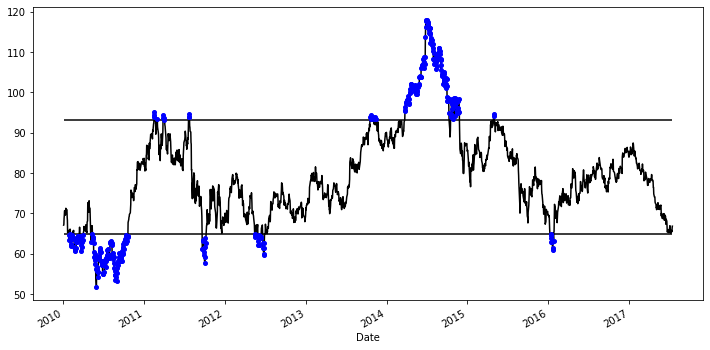

In [53]:
slb_close.plot(color='black', figsize=(12,6))
slb_top_bottom_10.plot(marker='o', style=' ', ms=4, color='blue')

xmin = criteria.index[0]
xmax = criteria.index[-1]
plt.hlines(y=[lower_10, upper_10], xmin=xmin, xmax=xmax,color='black')

# Determining the normality of stock market returns

In elementary statistics textbooks, the normal distribution is heavily relied upon to describe many different populations of data.  Although many random processes do appear to look like normal distributions most of the time, real-life tends to be more complex. Stock market returns are a prime example of a distribution that can look fairly normal but in actuality be quite far off.


In [54]:
# Load Amazon stock data and set the date as the index:

amzn = pd.read_csv('data/amzn_stock.csv', index_col='Date', parse_dates=['Date'])
amzn.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,136.25,136.61,133.14,133.90,7600543
2010-01-05,133.43,135.48,131.81,134.69,8856456
2010-01-06,134.60,134.73,131.65,132.25,7180977
2010-01-07,132.01,132.32,128.80,130.00,11030124
2010-01-08,130.56,133.68,129.03,133.52,9833829


In [56]:
# Create a Series by selecting only the closing price and then using the pct_change method to get the daily rate of return:

amzn_daily_return = amzn.Close.pct_change()
amzn_daily_return.head()

Date
2010-01-04         NaN
2010-01-05    0.005900
2010-01-06   -0.018116
2010-01-07   -0.017013
2010-01-08    0.027077
Name: Close, dtype: float64

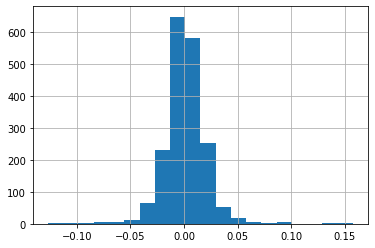

In [57]:
# Drop the missing value and plot a histogram of the returns to visually inspect the distribution:

amzn_daily_return = amzn_daily_return.dropna()
amzn_daily_return.hist(bins=20)

In [58]:
mean = amzn_daily_return.mean()  
std = amzn_daily_return.std()

In [60]:
 abs_z_score = amzn_daily_return.sub(mean).abs().div(std) 

In [61]:
pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]
print('{:.3f} fall within 1 standard deviation. '
      '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.787 fall within 1 standard deviation. 0.956 within 2 and 0.985 within 3


In [62]:
def test_return_normality(stock_data):
    close = stock_data['Close']
    daily_return = close.pct_change().dropna()
    daily_return.hist(bins=20)
    mean = daily_return.mean() 
    std = daily_return.std()
    
    abs_z_score = abs(daily_return - mean) / std
    pcts = [abs_z_score.lt(i).mean() for i in range(1,4)]

    print('{:.3f} fall within 1 standard deviation. '
          '{:.3f} within 2 and {:.3f} within 3'.format(*pcts))

0.742 fall within 1 standard deviation. 0.946 within 2 and 0.986 within 3


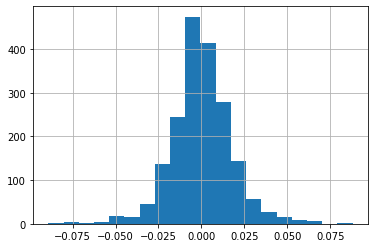

In [63]:
slb = pd.read_csv('data/slb_stock.csv', 
                  index_col='Date', parse_dates=['Date'])
test_return_normality(slb)